# Dictionary lookup and word error rates 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})


db_sentence = pd.read_pickle("db_trove_sentence_with_lookup.pkl")
db_sentence.head()

,filePath,articleId,articleType,year,ocrText,humanText,corrected,str_similarity,str_length_humanText,str_length_ocrText,quality_band,use_corrected,corrected_sentencizer,corrected_dict_lookup,ocr_sentencizer,ocr_dict_lookup
1,./trove_overproof/datasets/dataset1/rawTextAnd...,18378453,Article ILLUSTRATED,1953,"FROM RIVER CROSSING TO END OF TRIÄÜ I ^PI A^H""...",FROM RIVER CROSSING TO END OF TRIAL SPLASH: Pe...,FROM RIVER CROSSING TO END OF TRIAL SPLASH: Pe...,0.847561,746,820,2,0,"[[FROM, RIVER, CROSSING, TO, END, OF, TRIAL, S...","[[4, 5, 8, 2, 3, 2, 5, 6, 1, -5, -6, 8, 4, 4, ...","[[FROM, RIVER, CROSSING, TO, END, OF, TRIÄÜ, I...","[[4, 5, 8, 2, 3, 2, -5, 1, 1, 2, -3, 1, -5, -6..."
2,./trove_overproof/datasets/dataset1/rawTextAnd...,18363627,Article,1953,"Natural Childbirth Sir,-We nurses have seen fa...","Natural Childbirth Sir,-We nurses have seen fa...","Natural Childbirth Sir,-We nurses have seen fa...",0.964119,641,630,1,0,"[[Natural, Childbirth, Sir,-We, nurses, have, ...","[[7, 10, -7, 6, 4, 4, 3, 3, 4, 5, 6, 4, 6, 5, ...","[[Natural, Childbirth, Sir,-We, nurses, have, ...","[[7, 10, -7, 6, 4, 4, 3, 3, 4, 5, 6, 4, 6, 5, ..."
3,./trove_overproof/datasets/dataset1/rawTextAnd...,18366055,Article,1953,FIRST CHURCH I SERVICE 1 Presbyterian I ' Anni...,FIRST CHURCH SERVICE Presbyterian Anniversary ...,FIRST CHURCH SERVICE Presbyterian Anniversary ...,0.738901,946,832,3,0,"[[FIRST, CHURCH, SERVICE, Presbyterian, Annive...","[[5, 6, 7, 12, 11, 3, 5, 11, 2, 3, 5, 12, 6, 7...","[[FIRST, CHURCH, I, SERVICE, 1, Presbyterian, ...","[[5, 6, 1, 7, 1, 12, 1, 1, 11, 1, 3, 5, -12, 3..."
4,./trove_overproof/datasets/dataset1/rawTextAnd...,18386137,Article,1953,"""Bob"" Lulham's Fight Against Thallium District...","""Bob"" Lulham's Fight Against Thallium Arthur ...","""Bob"" Lulham's Fight Against Thallium Arthur ...",0.493898,2950,2740,4,0,"[["", Bob, "", Lulham, 's, Fight, Against, Thall...","[[1, 3, 1, -6, 2, 5, 7, 8, 6, 6, 1, 1, 3, 1, 1...","[["", Bob, "", Lulham, 's, Fight, Against, Thall...","[[1, 3, 1, -6, 2, 5, 7, 8, 8, 8, 1], [4, 5, 6,..."
5,./trove_overproof/datasets/dataset1/rawTextAnd...,18368961,Article,1953,"DIVORCE Before The Judge In Divorce, Mr Justic...","DIVORCE Before The Judge In Divorce, Mr. Justi...","DIVORCE Before The Judge In Divorce, Mr. Justi...",0.894176,1219,1121,2,0,"[[DIVORCE, Before, The, Judge, In, Divorce, ,,...","[[7, 6, 3, 5, 2, 7, 1, 2, 1, 7, -5, 7, 4, 1, 1...","[[DIVORCE, Before, The, Judge, In, Divorce, ,,...","[[7, 6, 3, 5, 2, 7, 1, 2, 7, -5, 7, 4, 1, 1, -..."


## Functions

In [2]:
"""
def human_ocr_percentage_remove_human_not_found(myrow, min_num_letters=4):
    corr_array = np.array(myrow["corrected_dict_lookup_list"]).astype(np.int)
    ocr_array = np.array(myrow["ocr_dict_lookup_list"]).astype(np.int)
    
    corr_array_not_found = len(corr_array[corr_array <= -min_num_letters])
    ocr_array_not_found = len(ocr_array[ocr_array <= -min_num_letters])
    really_not_found = ocr_array_not_found - corr_array_not_found
    if really_not_found < 0:
        return 100
    dict_perc = 1. - really_not_found / max(1, len(ocr_array[abs(ocr_array) >= min_num_letters]))
    return dict_perc*100
"""

'\ndef human_ocr_percentage_remove_human_not_found(myrow, min_num_letters=4):\n    corr_array = np.array(myrow["corrected_dict_lookup_list"]).astype(np.int)\n    ocr_array = np.array(myrow["ocr_dict_lookup_list"]).astype(np.int)\n    \n    corr_array_not_found = len(corr_array[corr_array <= -min_num_letters])\n    ocr_array_not_found = len(ocr_array[ocr_array <= -min_num_letters])\n    really_not_found = ocr_array_not_found - corr_array_not_found\n    if really_not_found < 0:\n        return 100\n    dict_perc = 1. - really_not_found / max(1, len(ocr_array[abs(ocr_array) >= min_num_letters]))\n    return dict_perc*100\n'

In [3]:
def human_ocr_percentage(myrow, colname="ocr_dict_lookup_list", min_num_letters=4):
    myrow_array = np.array(myrow[colname]).astype(np.int)
    ocr_perc = len(myrow_array[myrow_array >= min_num_letters]) / max(1, len(myrow_array[abs(myrow_array) >= min_num_letters]))
    return ocr_perc*100

In [4]:
def jaccard_similarity_df(myrow, colname_1, colname_2, make_lowercase=True):
    """
    Jaccard similarity between two documents (e.g., OCR and Human) on flattened list of words
    """
    list1 = myrow[colname_1]
    list2 = myrow[colname_2]
    if make_lowercase:
        list1 = [x.lower() for x in list1]
        list2 = [x.lower() for x in list2]
    intersection = len(set(list1).intersection(set(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [5]:
def jaccard_similarity_df_each_sentence(myrow, colname_1, colname_2):
    """
    Jaccard similarity between two documents (e.g., OCR and Human) by averaging over all sentences
    """
    jaccard_mean = 0
    counter = 0
    for i in range(len(myrow[colname_1])):
        try:
            intersection = len(list(set(myrow[colname_1][i]).intersection(myrow[colname_2][i])))
            union = (len(myrow[colname_1][i]) + len(set(myrow[colname_2][i]))) - intersection
            jaccard_mean += float(intersection) / union
            counter += 1
        except IndexError:
            jaccard_mean += 0
            counter += 1
    return jaccard_mean / max(1, counter)

## OCR Dataset

In [7]:
db_sentence['ocr_dict_lookup_list'] = \
    db_sentence.apply(lambda x: [item for sublist in x['ocr_dict_lookup'] for item in sublist], axis=1)

In [8]:
min_num_letters = 3
db_sentence['ocr_dict_perc'] = \
    db_sentence.apply(human_ocr_percentage, args=["ocr_dict_lookup_list", min_num_letters], axis=1)

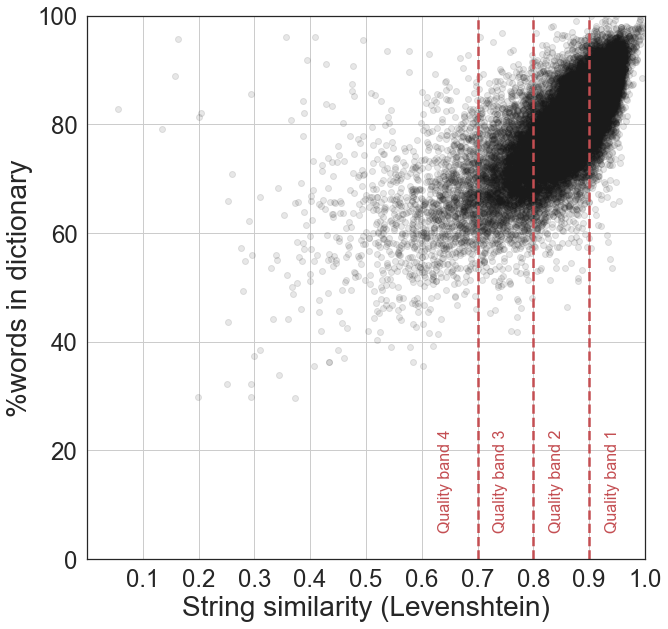

"\n#Other:\n\nimport seaborn as sns\ncurrent_palette = sns.color_palette()\n\nplt.plot(db_sentence[db_sentence['quality_band'] == 1]['str_similarity'], \n         db_sentence[db_sentence['quality_band'] == 1]['ocr_dict_perc'], 'o', \n         alpha=0.1, \n         c=current_palette[0], \n         label='Quality band 1'\n        )\n\nplt.plot(db_sentence[db_sentence['quality_band'] == 2]['str_similarity'], \n         db_sentence[db_sentence['quality_band'] == 2]['ocr_dict_perc'], 'o', \n         alpha=0.1, c=current_palette[1], \n         label='Quality band 2'\n        )\n\nplt.plot(db_sentence[db_sentence['quality_band'] == 3]['str_similarity'], \n         db_sentence[db_sentence['quality_band'] == 3]['ocr_dict_perc'], 'o', \n         alpha=0.1, c=current_palette[2], \n         label='Quality band 3'\n        )\n\nplt.plot(db_sentence[db_sentence['quality_band'] == 4]['str_similarity'], \n         db_sentence[db_sentence['quality_band'] == 4]['ocr_dict_perc'], 'o', \n         alpha=0.

In [9]:
plt.figure(figsize=(10, 10))

plt.plot(db_sentence['str_similarity'], 
         db_sentence['ocr_dict_perc'], 'ko', 
         alpha=0.1, 
        )

plt.text(0.95, 5, 'Quality band 1', fontsize=16,
        rotation=90, rotation_mode='anchor', color='r')
plt.text(0.85, 5, 'Quality band 2', fontsize=16,
        rotation=90, rotation_mode='anchor', color='r')
plt.text(0.75, 5, 'Quality band 3', fontsize=16,
        rotation=90, rotation_mode='anchor', color='r')
plt.text(0.65, 5, 'Quality band 4', fontsize=16,
        rotation=90, rotation_mode='anchor', color='r')

plt.grid()
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], size=24)
plt.yticks(size=24)
plt.xlabel("String similarity (Levenshtein)", size=28)
plt.ylabel("%words in dictionary", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0, 100)
#plt.title("Words with {} letters or more".format(min_num_letters), size=32)
plt.axvline(0.9, 0, 1, c='r', ls='--')
plt.axvline(0.8, 0, 1, c='r', ls='--')
plt.axvline(0.7, 0, 1, c='r', ls='--')

#plt.legend(prop={'size': 24})
plt.show()


"""
#Other:

import seaborn as sns
current_palette = sns.color_palette()

plt.plot(db_sentence[db_sentence['quality_band'] == 1]['str_similarity'], 
         db_sentence[db_sentence['quality_band'] == 1]['ocr_dict_perc'], 'o', 
         alpha=0.1, 
         c=current_palette[0], 
         label='Quality band 1'
        )

plt.plot(db_sentence[db_sentence['quality_band'] == 2]['str_similarity'], 
         db_sentence[db_sentence['quality_band'] == 2]['ocr_dict_perc'], 'o', 
         alpha=0.1, c=current_palette[1], 
         label='Quality band 2'
        )

plt.plot(db_sentence[db_sentence['quality_band'] == 3]['str_similarity'], 
         db_sentence[db_sentence['quality_band'] == 3]['ocr_dict_perc'], 'o', 
         alpha=0.1, c=current_palette[2], 
         label='Quality band 3'
        )

plt.plot(db_sentence[db_sentence['quality_band'] == 4]['str_similarity'], 
         db_sentence[db_sentence['quality_band'] == 4]['ocr_dict_perc'], 'o', 
         alpha=0.1, c=current_palette[3], 
         label='Quality band 4'
        )
"""

In [10]:
db_sentence['ocr_dict_perc']

1        79.439252
2        96.590909
3        82.000000
4        95.580110
5        82.882883
           ...    
30505    91.935484
30506    92.268908
30507    94.172494
30508    93.220339
30509    95.275591
Name: ocr_dict_perc, Length: 30509, dtype: float64

## Corrected Dataset

In [14]:
db_sentence['corrected_dict_lookup_list'] = \
    db_sentence.apply(lambda x: [item for sublist in x['corrected_dict_lookup'] for item in sublist], axis=1)

In [15]:
min_num_letters = 3
db_sentence['corr_dict_perc'] = \
    db_sentence.apply(human_ocr_percentage, args=["corrected_dict_lookup_list", min_num_letters], axis=1)

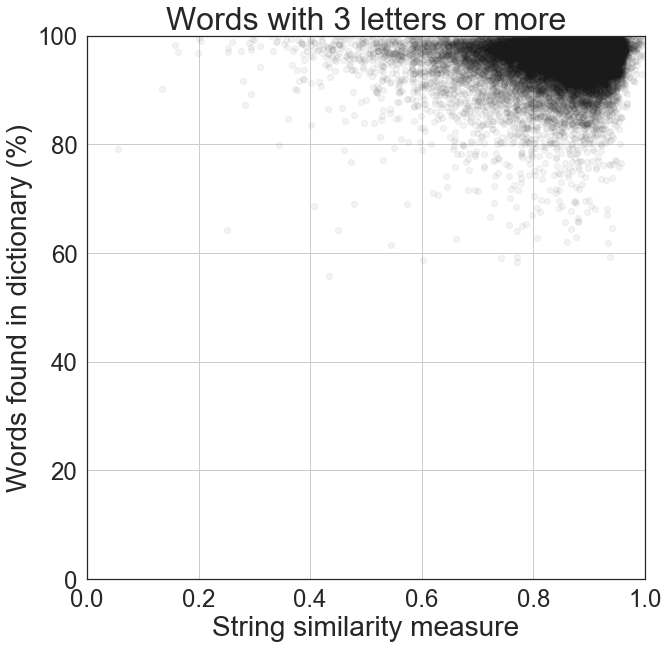

In [16]:
plt.figure(figsize=(10, 10))
plt.plot(db_sentence['str_similarity'], db_sentence['corr_dict_perc'], 'ko', alpha=0.05)
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("String similarity measure", size=28)
plt.ylabel("Words found in dictionary (%)", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0, 100)
plt.title("Words with {} letters or more".format(min_num_letters), size=32)
plt.show()

## Jaccard similarity, on flattened list of words

In [17]:
db_sentence['corrected_sentencizer_list'] = \
    db_sentence.apply(lambda x: [item for sublist in x['corrected_sentencizer'] for item in sublist], axis=1)

In [18]:
db_sentence['ocr_sentencizer_list'] = \
    db_sentence.apply(lambda x: [item for sublist in x['ocr_sentencizer'] for item in sublist], axis=1)

In [19]:
db_sentence['jaccard_similarity'] = \
    db_sentence.apply(jaccard_similarity_df, args=['ocr_sentencizer_list', "corrected_sentencizer_list", True], axis=1)

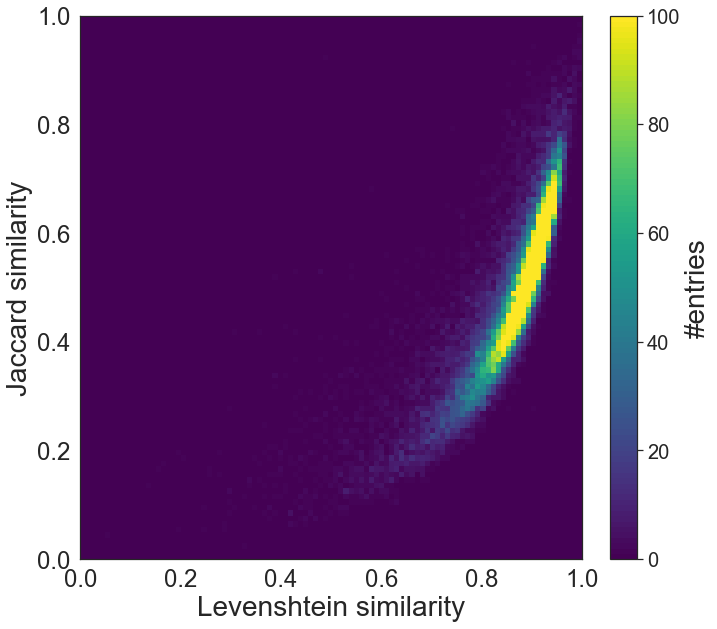

In [20]:
plt.figure(figsize=(10, 10))

xbins = np.linspace(0, 1, 100)
ybins = np.linspace(0, 1, 100)

plt.hist2d(db_sentence['str_similarity'], db_sentence['jaccard_similarity'], 
           bins=[xbins, ybins],
           vmax=100,
           cmap=plt.cm.get_cmap('viridis', 100)
          )
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("Levenshtein similarity", size=28)
plt.ylabel("Jaccard similarity", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

cbar = plt.colorbar(aspect=20, orientation="vertical", fraction=0.05)
cbar.set_label('#entries',size=28)
cbar.ax.tick_params(labelsize=20) 
plt.show()


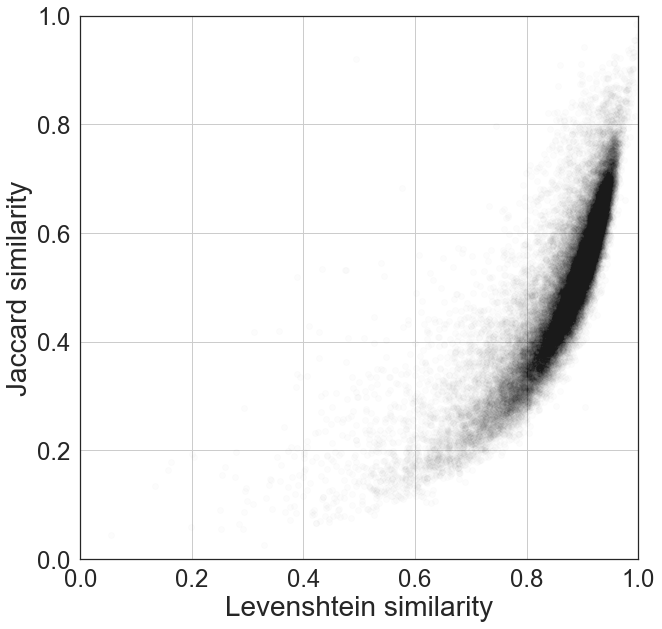

In [21]:
plt.figure(figsize=(10, 10))
plt.plot(db_sentence['str_similarity'], db_sentence['jaccard_similarity'], 'ko', alpha=0.01)
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("Levenshtein similarity", size=28)
plt.ylabel("Jaccard similarity", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0, 1.0)
plt.show()

In [22]:
db_sentence.to_pickle("db_trove_v002.pkl")

In [23]:
db_sentence.head()

,filePath,articleId,articleType,year,ocrText,humanText,corrected,str_similarity,str_length_humanText,str_length_ocrText,...,corrected_dict_lookup,ocr_sentencizer,ocr_dict_lookup,ocr_dict_lookup_list,ocr_dict_perc,corrected_dict_lookup_list,corr_dict_perc,corrected_sentencizer_list,ocr_sentencizer_list,jaccard_similarity
1,./trove_overproof/datasets/dataset1/rawTextAnd...,18378453,Article ILLUSTRATED,1953,"FROM RIVER CROSSING TO END OF TRIÄÜ I ^PI A^H""...",FROM RIVER CROSSING TO END OF TRIAL SPLASH: Pe...,FROM RIVER CROSSING TO END OF TRIAL SPLASH: Pe...,0.847561,746,820,...,"[[4, 5, 8, 2, 3, 2, 5, 6, 1, -5, -6, 8, 4, 4, ...","[[FROM, RIVER, CROSSING, TO, END, OF, TRIÄÜ, I...","[[4, 5, 8, 2, 3, 2, -5, 1, 1, 2, -3, 1, -5, -6...","[4, 5, 8, 2, 3, 2, -5, 1, 1, 2, -3, 1, -5, -6,...",79.439252,"[4, 5, 8, 2, 3, 2, 5, 6, 1, -5, -6, 8, 4, 4, 5...",92.079208,"[FROM, RIVER, CROSSING, TO, END, OF, TRIAL, SP...","[FROM, RIVER, CROSSING, TO, END, OF, TRIÄÜ, I,...",0.557143
2,./trove_overproof/datasets/dataset1/rawTextAnd...,18363627,Article,1953,"Natural Childbirth Sir,-We nurses have seen fa...","Natural Childbirth Sir,-We nurses have seen fa...","Natural Childbirth Sir,-We nurses have seen fa...",0.964119,641,630,...,"[[7, 10, -7, 6, 4, 4, 3, 3, 4, 5, 6, 4, 6, 5, ...","[[Natural, Childbirth, Sir,-We, nurses, have, ...","[[7, 10, -7, 6, 4, 4, 3, 3, 4, 5, 6, 4, 6, 5, ...","[7, 10, -7, 6, 4, 4, 3, 3, 4, 5, 6, 4, 6, 5, 2...",96.590909,"[7, 10, -7, 6, 4, 4, 3, 3, 4, 5, 6, 4, 6, 5, 2...",98.876404,"[Natural, Childbirth, Sir,-We, nurses, have, s...","[Natural, Childbirth, Sir,-We, nurses, have, s...",0.855556
3,./trove_overproof/datasets/dataset1/rawTextAnd...,18366055,Article,1953,FIRST CHURCH I SERVICE 1 Presbyterian I ' Anni...,FIRST CHURCH SERVICE Presbyterian Anniversary ...,FIRST CHURCH SERVICE Presbyterian Anniversary ...,0.738901,946,832,...,"[[5, 6, 7, 12, 11, 3, 5, 11, 2, 3, 5, 12, 6, 7...","[[FIRST, CHURCH, I, SERVICE, 1, Presbyterian, ...","[[5, 6, 1, 7, 1, 12, 1, 1, 11, 1, 3, 5, -12, 3...","[5, 6, 1, 7, 1, 12, 1, 1, 11, 1, 3, 5, -12, 3,...",82.000000,"[5, 6, 7, 12, 11, 3, 5, 11, 2, 3, 5, 12, 6, 7,...",99.206349,"[FIRST, CHURCH, SERVICE, Presbyterian, Anniver...","[FIRST, CHURCH, I, SERVICE, 1, Presbyterian, I...",0.410072
4,./trove_overproof/datasets/dataset1/rawTextAnd...,18386137,Article,1953,"""Bob"" Lulham's Fight Against Thallium District...","""Bob"" Lulham's Fight Against Thallium Arthur ...","""Bob"" Lulham's Fight Against Thallium Arthur ...",0.493898,2950,2740,...,"[[1, 3, 1, -6, 2, 5, 7, 8, 6, 6, 1, 1, 3, 1, 1...","[["", Bob, "", Lulham, 's, Fight, Against, Thall...","[[1, 3, 1, -6, 2, 5, 7, 8, 8, 8, 1], [4, 5, 6,...","[1, 3, 1, -6, 2, 5, 7, 8, 8, 8, 1, 4, 5, 6, 6,...",95.580110,"[1, 3, 1, -6, 2, 5, 7, 8, 6, 6, 1, 1, 3, 1, 1,...",95.652174,"["", Bob, "", Lulham, 's, Fight, Against, Thalli...","["", Bob, "", Lulham, 's, Fight, Against, Thalli...",0.920000
5,./trove_overproof/datasets/dataset1/rawTextAnd...,18368961,Article,1953,"DIVORCE Before The Judge In Divorce, Mr Justic...","DIVORCE Before The Judge In Divorce, Mr. Justi...","DIVORCE Before The Judge In Divorce, Mr. Justi...",0.894176,1219,1121,...,"[[7, 6, 3, 5, 2, 7, 1, 2, 1, 7, -5, 7, 4, 1, 1...","[[DIVORCE, Before, The, Judge, In, Divorce, ,,...","[[7, 6, 3, 5, 2, 7, 1, 2, 7, -5, 7, 4, 1, 1, -...","[7, 6, 3, 5, 2, 7, 1, 2, 7, -5, 7, 4, 1, 1, -6...",82.882883,"[7, 6, 3, 5, 2, 7, 1, 2, 1, 7, -5, 7, 4, 1, 1,...",86.486486,"[DIVORCE, Before, The, Judge, In, Divorce, ,, ...","[DIVORCE, Before, The, Judge, In, Divorce, ,, ...",0.747826


## Jaccard similarity, averaging over all sentences

In [24]:
from pandarallel import pandarallel
# Initialization
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data tranfer (pipe) to transfer data between the main process and workers.


In [25]:
db_sentence['jaccard_similarity_mean_sentence'] = \
    db_sentence.parallel_apply(jaccard_similarity_df_each_sentence, args=['ocr_sentencizer', "corrected_sentencizer"], axis=1)

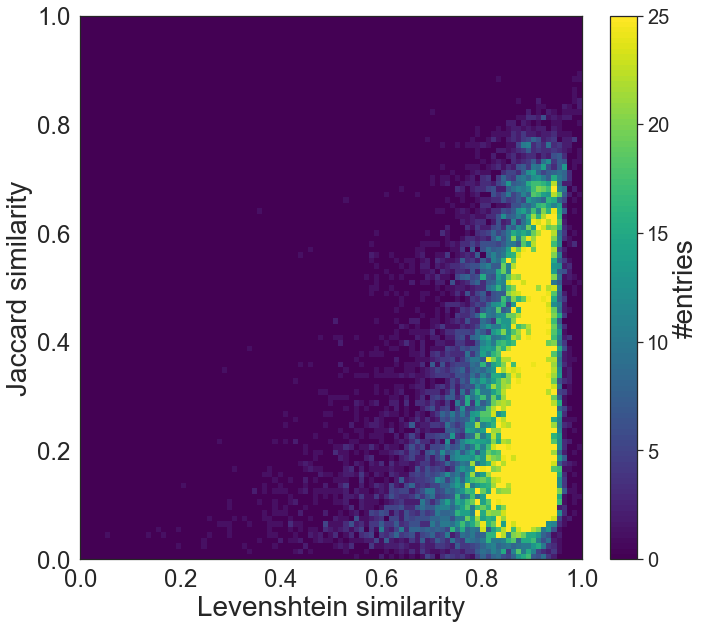

In [26]:
plt.figure(figsize=(10, 10))

xbins = np.linspace(0, 1, 100)
ybins = np.linspace(0, 1, 100)

plt.hist2d(db_sentence['str_similarity'], db_sentence['jaccard_similarity_mean_sentence'], 
           bins=[xbins, ybins],
           vmax=25,
           cmap=plt.cm.get_cmap('viridis', 100)
          )
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("Levenshtein similarity", size=28)
plt.ylabel("Jaccard similarity", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

cbar = plt.colorbar(aspect=20, orientation="vertical", fraction=0.05)
cbar.set_label('#entries',size=28)
cbar.ax.tick_params(labelsize=20) 
plt.show()

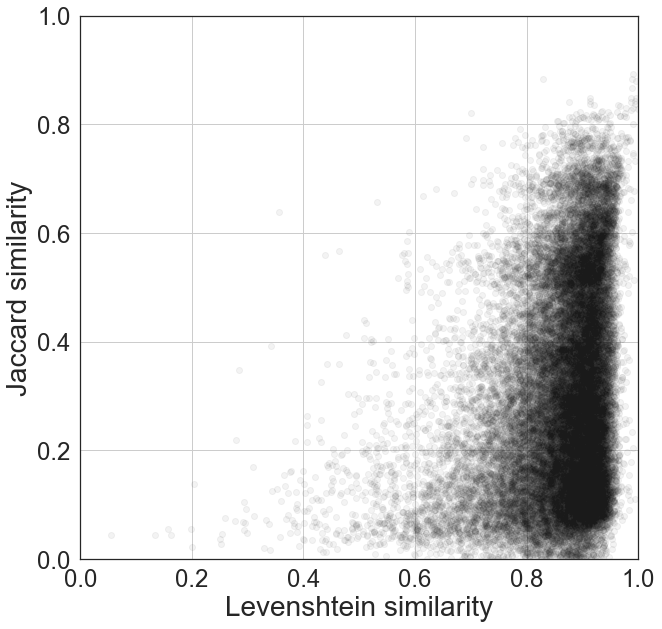

In [27]:
plt.figure(figsize=(10, 10))
plt.plot(db_sentence['str_similarity'], db_sentence['jaccard_similarity_mean_sentence'], 'ko', alpha=0.05)
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("Levenshtein similarity", size=28)
plt.ylabel("Jaccard similarity", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0, 1.0)
plt.show()

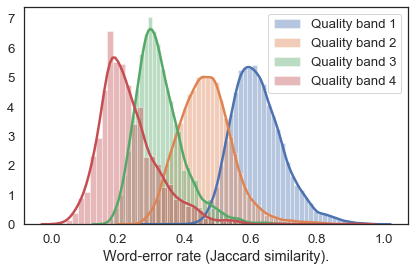

In [28]:
df = pd.read_pickle("db_trove_v002.pkl")

for b in range(1,5):
    sns.distplot(df[df["quality_band"]==b]["jaccard_similarity"], label="Quality band %d"%b)
plt.xlabel("Word-error rate (Jaccard similarity).")
plt.legend()
plt.tight_layout()
plt.savefig("figures/topic_modelling/OCR_quality_jaccard_distr_by_band.pdf")